# Notebook on data engineering and modelisation

This notebook will focus on the data engineering and modeling part. <br>
This notebook is divided in three parts : 
- Modification of the data and visualisation
- Modeling on the first 20 products
- Modeling over all the products

<div class="alert alert-info">
    Even though the two sale's stations were located near Rouen, we'll call :
    <ul>
        <li>Rouen's Station : NF059473</li>
        <li>Paris' Station : NF078544</li>
    </ul>
</div>

In [2]:
# ------------------------Required libraries--------------------------------#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgno
import sklearn
import pandas_profiling
from scipy.stats import itemfreq
import datetime
from datetime import date, timedelta
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from vecstack import stacking
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import warnings
warnings.filterwarnings('ignore'
from sklearn.preprocessing import normalize

SyntaxError: invalid syntax (<ipython-input-2-3d8f175419f2>, line 27)

Import of the different library used in this notebook :
- Pandas, numpy, datetime for data modification
- Seaborn, matplotlib for data visualisation
- sklearn, scipy and kera for modeling

# 1 - Data Understanding:

### A - Loading The Data :

In [2]:
train = pd.read_csv('./Data/train.csv', sep=';', index_col= 0)  # set Id to be the index column
test =  pd.read_csv('./Data/test.csv', sep=';', index_col= 0 )  #idem
pd.options.display.max_columns=100

In [3]:
train.head(5)

,implant,date,article_nom,id_categorie_6,qte_article_vendue,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,cat4_nom,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,rr3_15h_rouen,ff_15h_rouen,t_9h_paris,n_9h_paris,rr3_9h_paris,ff_9h_paris,t_15h_paris,n_15h_paris,rr3_15h_paris,ff_15h_paris,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39fc404102d5,NF059473,2016-01-01,Cookie Cara Noix Pecan 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
aa697ce32b43,NF059473,2016-01-01,Cookie Choc Blc 70G Michel Augustin,1001672,"1,11",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
291a469e1b50,NF059473,2016-01-01,Cookie Choc Nois 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
2dbc07dbc8f0,NF059473,2016-01-01,Cookie Choco 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
e664714361d6,NF059473,2016-01-01,Croissant 60G Cuit/Place Neuhauser,1001674,"4,08",1001665,1001639,Vienn cuit/place,Viennoiserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-info">
Indices are based on the ID column, we're reseting the index
</div>

In [4]:
# Indexes are weird so we reset them:

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
test.head(5)

,implant,date,article_nom,id_categorie_6,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,cat4_nom,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,rr3_15h_rouen,ff_15h_rouen,t_9h_paris,n_9h_paris,rr3_9h_paris,ff_9h_paris,t_15h_paris,n_15h_paris,rr3_15h_paris,ff_15h_paris,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
0,NF059473,2017-04-16,Cookie Cara Noix Pecan 70G Michel Augustin,1001672,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"283,85","100,0","0,0","2,8","285,55","100,0","0,0","5,6","283,35","100,0","0,0","3,3","286,25","75,0","0,0","4,9",0,0,0,0,0,0,1,1,1,0,0,0
1,NF059473,2017-04-16,Cookie Choc Blc 70G Michel Augustin,1001672,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"283,85","100,0","0,0","2,8","285,55","100,0","0,0","5,6","283,35","100,0","0,0","3,3","286,25","75,0","0,0","4,9",0,0,0,0,0,0,1,1,1,0,0,0
2,NF059473,2017-04-16,Cookie Choc Nois 70G Michel Augustin,1001672,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"283,85","100,0","0,0","2,8","285,55","100,0","0,0","5,6","283,35","100,0","0,0","3,3","286,25","75,0","0,0","4,9",0,0,0,0,0,0,1,1,1,0,0,0
3,NF059473,2017-04-16,Cookie Choco 70G Michel Augustin,1001672,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"283,85","100,0","0,0","2,8","285,55","100,0","0,0","5,6","283,35","100,0","0,0","3,3","286,25","75,0","0,0","4,9",0,0,0,0,0,0,1,1,1,0,0,0
4,NF059473,2017-04-16,Croissant 60G Cuit/Place Neuhauser,1001674,1001665,1001639,Vienn cuit/place,Viennoiserie,Boulan Vienn Patiss,"283,85","100,0","0,0","2,8","285,55","100,0","0,0","5,6","283,35","100,0","0,0","3,3","286,25","75,0","0,0","4,9",0,0,0,0,0,0,1,1,1,0,0,0


### B - Data Description :

In [5]:
print("----> Shape of our dataframes : ")
print("--> train dataframe has {} examples with {} features (target variable included) and  with a total number of missing values eq-ual to {}.".format(train.shape[0],train.shape[1],train.isnull().sum().sum()))
print("--> test has {} examples with {} features and with a total number of missing values equal to {} .".format(test.shape[0],train.shape[1],test.isnull().sum().sum()))

----> Shape of our dataframes : 
--> train dataframe has 198288 examples with 38 features (target variable included) and  with a total number of missing values eq-ual to 0.
--> test has 12240 examples with 38 features and with a total number of missing values equal to 0 .


In [6]:
print("Types of our features :")
print("                     ")
print(train.dtypes)

Types of our features :
                     
implant               object
date                  object
article_nom           object
id_categorie_6         int64
qte_article_vendue    object
id_categorie_5         int64
id_categorie_4         int64
cat6_nom              object
cat5_nom              object
cat4_nom              object
t_9h_rouen            object
n_9h_rouen            object
rr3_9h_rouen          object
ff_9h_rouen           object
t_15h_rouen           object
n_15h_rouen           object
rr3_15h_rouen         object
ff_15h_rouen          object
t_9h_paris            object
n_9h_paris            object
rr3_9h_paris          object
ff_9h_paris           object
t_15h_paris           object
n_15h_paris           object
rr3_15h_paris         object
ff_15h_paris          object
aller_zone_1           int64
aller_zone_2           int64
aller_zone_3           int64
aller_zone_4           int64
aller_zone_5           int64
aller_zone_6           int64
retour_zone_1          int

<div class="alert alert-info">
We can see that most of the column are considered as objects. However, we know for instance that the $aller_zone\_*$ and $retour_zone\_*$ are categorical variable, hence should not be considered as int (cf <b>Data visualisation notebook</b>). On the other hand we have object variable that should be considered as int as : $rr3\_*$. They are ratio variables. So we'll need to work around this issue.
</div>

In [7]:
train.shape

(198288, 38)

In [8]:
id_split=min(train[train['date']>='2017-04-16'].index)
# id that i will use to split my data when training models using all my data.

<div class="alert alert-info">
We remark that : 
<ol>
<li>products don't have ids we have just "article_nom". So, it's better to add a new numerical column "article_id".</li>
<li>We should convert quantity of items sold, temperature, nebulosity, rainfall and wind speed to numeric. </li>
</ol>
<i> Sales may depend on school holidays. So we will add a holiday column. </i>
</div>

# 2 - Data Preparation : 

### Creat the column "article_id" : 

In [9]:
# Product list :

pList=train.article_nom.unique()

# Dictionary with the product name as key and the product id as value :

dictProductId={pList[i]:i+1 for i in range(len(pList))}

# Adding article_id to the train set :

article_id=[dictProductId[train.article_nom[i]] for i in range(len(train.article_nom))]
train["article_id"]=article_id


<div class="alert alert-success">
Column created
</div>

### Convert quantity of items sold, temperature, nebulosity, rainfall and wind speed to numeric :

In [10]:
train["qte_article_vendue"] = train["qte_article_vendue"].apply(lambda var: var.replace(",","."))
train["qte_article_vendue"] = pd.to_numeric(train["qte_article_vendue"])

train["n_9h_rouen"] = train["n_9h_rouen"].apply(lambda var: var.replace(",","."))
train["n_9h_rouen"] = pd.to_numeric(train["n_9h_rouen"])
train["t_9h_rouen"] = train["t_9h_rouen"].apply(lambda var: var.replace(",","."))
train["t_9h_rouen"] = pd.to_numeric(train["t_9h_rouen"])
train["rr3_9h_rouen"] = train["rr3_9h_rouen"].apply(lambda var: var.replace(",","."))
train["rr3_9h_rouen"] = pd.to_numeric(train["rr3_9h_rouen"])
train["rr3_9h_rouen"] = train["rr3_9h_rouen"].apply(lambda var: max(0,var))
train["ff_9h_rouen"] = train["ff_9h_rouen"].apply(lambda var: var.replace(",","."))
train["ff_9h_rouen"] = pd.to_numeric(train["ff_9h_rouen"])
train["n_15h_rouen"] = train["n_15h_rouen"].apply(lambda var: var.replace(",","."))
train["n_15h_rouen"] = pd.to_numeric(train["n_15h_rouen"])
train["t_15h_rouen"] = train["t_15h_rouen"].apply(lambda var: var.replace(",","."))
train["t_15h_rouen"] = pd.to_numeric(train["t_15h_rouen"])
train["rr3_15h_rouen"] = train["rr3_15h_rouen"].apply(lambda var: var.replace(",","."))
train["rr3_15h_rouen"] = pd.to_numeric(train["rr3_15h_rouen"])
train["rr3_15h_rouen"] = train["rr3_15h_rouen"].apply(lambda var: max(0,var))
train["ff_15h_rouen"] = train["ff_15h_rouen"].apply(lambda var: var.replace(",","."))
train["ff_15h_rouen"] = pd.to_numeric(train["ff_15h_rouen"])

train["n_9h_paris"] = train["n_9h_paris"].apply(lambda var: var.replace(",","."))
train["n_9h_paris"] = pd.to_numeric(train["n_9h_paris"])
train["t_9h_paris"] = train["t_9h_paris"].apply(lambda var: var.replace(",","."))
train["t_9h_paris"] = pd.to_numeric(train["t_9h_paris"])
train["rr3_9h_paris"] = train["rr3_9h_paris"].apply(lambda var: var.replace(",","."))
train["rr3_9h_paris"] = pd.to_numeric(train["rr3_9h_paris"])
train["rr3_9h_paris"] = train["rr3_9h_paris"].apply(lambda var: max(0,var))
train["ff_9h_paris"] = train["ff_9h_paris"].apply(lambda var: var.replace(",","."))
train["ff_9h_paris"] = pd.to_numeric(train["ff_9h_paris"])
train["n_15h_paris"] = train["n_15h_paris"].apply(lambda var: var.replace(",","."))
train["n_15h_paris"] = pd.to_numeric(train["n_15h_paris"])
train["t_15h_paris"] = train["t_15h_paris"].apply(lambda var: var.replace(",","."))
train["t_15h_paris"] = pd.to_numeric(train["t_15h_paris"])
train["rr3_15h_paris"] = train["rr3_15h_paris"].apply(lambda var: var.replace(",","."))
train["rr3_15h_paris"] = pd.to_numeric(train["rr3_15h_paris"])
train["rr3_15h_paris"] = train["rr3_15h_paris"].apply(lambda var: max(0,var))
train["ff_15h_paris"] = train["ff_15h_paris"].apply(lambda var: var.replace(",","."))
train["ff_15h_paris"] = pd.to_numeric(train["ff_15h_paris"])



<div class="alert alert-success">
Here, all of our numerical values were written according to french language : "." = ",". That's why it wasn't recognized as int on the first read. 
</div>

### Add holiday column : 

<div class="alert alert-info">
The purpose of this holiday column is to cut the year between holidays and normal days according to the holiday Zone. Indeed, holidays period are more crowded than other ones. So the model needs to understand that they are "special" periods. 
</div>

Holidays are taken from : https://vacances-scolaires.education/annee-2016-2017.php

In [17]:
def isholiday(md):
    holA = ""
    holB = ""
    holC = ""
    
    tmp_date = md
    result = "holidays"
    
    for k in holidays_A_:
        if tmp_date>= k[0] and tmp_date <= k[1]:
            holA = "A"
            break
    
    for j in holidays_B_:
        if tmp_date>= j[0] and tmp_date <= j[1]:
            holB = "B"
            break
    
    for j in holidays_C_:
        if tmp_date>= j[0] and tmp_date <= j[1]:
            holC = "C"
            break
    
    if((holA == "") and (holB == "") and (holC == "")):
        return "no_"+result
    

    return result+holA+holB+holC

According to a date, and three dictionaries : $holidays\_A$ , $holidays\_B$ , $holidays\_C$, we're checking wether it's a holiday or not and for which zone according to the site. <br>
For instance, if the date is a holiday for zone A and C it will return "holidayAC". This allow us to do a segmentation according to the different holidays.

### Distinction between each zones

In [12]:
train['date']=pd.to_datetime(train['date'])

In [13]:
train['date'] = train['date'].apply(lambda var : var.to_pydatetime().date())

In [1]:
from datetime import date, timedelta

#Holidays period
holidays_C = [ ('2016-02-20','2016-03-07'), ('2016-04-16','2016-05-02'), ('2016-05-04','2016-05-09'), ('2016-06-30','2016-09-01'), ('2016-10-19','2016-11-03'), ('2016-12-17','2017-01-03'), ('2017-02-04','2017-02-20'), ('2017-04-01','2017-04-18') ]    
holidays_B = [ ('2016-02-06','2016-02-22'), ('2016-04-02','2016-04-16'), ('2016-05-04','2016-05-09'), ('2016-06-30','2016-09-01'), ('2016-10-19','2016-11-03'), ('2016-12-17','2017-01-03'), ('2017-02-11','2017-02-27'), ('2017-04-08','2017-04-24') ]    
holidays_A = [ ('2016-02-13','2016-02-29'), ('2016-04-09','2016-04-25'), ('2016-05-04','2016-05-09'), ('2016-06-30','2016-09-01'), ('2016-10-19','2016-11-03'), ('2016-12-17','2017-01-03'), ('2017-02-18','2017-03-06'), ('2017-04-15','2017-05-02') ]    

holidays_C_ = []
holidays_B_ = []
holidays_A_ = []

#Transformation of string into datetime objects
for k in holidays_C:
    tmp = list(map(int,k[0].split('-')))
    tmp1 = list(map(int,k[1].split('-')))
    holidays_C_.append((date(tmp[0],tmp[1],tmp[2]),date(tmp1[0],tmp1[1],tmp1[2])))

for k in holidays_A:
    tmp = list(map(int,k[0].split('-')))
    tmp1 = list(map(int,k[1].split('-')))
    holidays_A_.append((date(tmp[0],tmp[1],tmp[2]),date(tmp1[0],tmp1[1],tmp1[2])))

for k in holidays_B:
    tmp = list(map(int,k[0].split('-')))
    tmp1 = list(map(int,k[1].split('-')))
    holidays_B_.append((date(tmp[0],tmp[1],tmp[2]),date(tmp1[0],tmp1[1],tmp1[2])))

In [15]:
unique_date = list(train['date'].unique())

In [18]:
#Applyinh isholiday() to "unique date" and not the dataset to save computation time
holidays = {}
for k in unique_date:
    holidays[k] = isholiday(k)

In [19]:
#Creating the new column
train["holidays_Zone"] = train['date'].apply(lambda var : holidays[var])

<div class="alert alert-success">
Holiday column created
</div>

### Segmentation on departure dates

<div class="alert alert-success">
As for holidays period, depratur period (for holidays) are even more special. It's far more crowded during these times, so we need to make a distinction
<div>

In [20]:
departure_date = ['2016-02-12', '2016-02-13', '2016-02-14',
                  '2016-02-5', '2016-02-6', '2016-02-7',
                  '2016-02-19', '2016-02-20', '2016-02-21',
                  '2016-04-8' , '2016-04-9', '2016-04-10',
                  '2016-04-1' , '2016-04-2', '2016-04-3',
                  '2016-04-15', '2016-04-16', '2016-04-17',
                  '2016-05-4', '2016-05-5',
                  '2016-10-19', '2016-10-20',
                  '2016-12-16', '2016-12-17', '2016-12-18',
                  '2017-02-17', '2017-12-18', '2017-12-19', 
                  '2017-02-10', '2017-02-11', '2017-02-12', 
                  '2017-02-3', '2017-02-4', '2017-02-5',
                  '2017-04-14', '2017-04-15', '2017-04-16', 
                  '2017-04-7', '2017-04-8', '2017-04-9', 
                  '2017-04-1', '2017-04-2', '2017-03-31'
                  
                 ]

In [21]:
#Converting the string into datetime objects
datetime_departure_date = []
for k in departure_date:
    tmp = list(map(int,k.split('-')))
    datetime_departure_date.append(date(tmp[0],tmp[1],tmp[2]))

In [22]:
#Creating the new column
train['departure'] = train.apply(lambda line : 'departure' if line['date'] in datetime_departure_date else 'no_departure',axis = 1)

<div class="alert alert-success">
    departure column created
<div>

### Now we change date into year, month and day:

<div class="alert alert-info">
    We don't want the model to learn perfectly for a given year. It will induce overfitting. In order to avoid that, we'll create two columns, for days and month.
    
   Furhtermore, what's interesting in the date is the month (because there is an annual seasonality), but also the day (because of the weekly seasonality).
<div>

In [23]:
days = {0 : 'Monday',
        1 : 'Tuesday',
        2 : 'Wednesday',
        3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday'}

In [24]:
train['month'] = train['date'].apply(lambda var : var.month)
train['day'] = train['date'].apply(lambda var : days[var.weekday()])

<div class="alert alert-success">
    Columns created
</div>

### Changing city's related variable

<div class="alert alert-info">
    As we saw in the <b>Data visualisation notebook</b>, the two stations are located near Rouen. After few atempts of modelization, we had a slight improvement by just considering Rouen's related variable.
    
   As we'll see in the modeling part, this is probably due to the curse of dimensionality. Since we have a lot of categorical variable, we used one hot encoding. Hence the more categorical variable we used, the more column we had. So by removing 8 columns of categorical variable, we saved the creation of around 24 columns
</div>

In [ ]:
train.drop(['t_9h_paris', 'n_9h_paris', 'rr3_9h_paris',
       'ff_9h_paris', 't_15h_paris', 'n_15h_paris', 'rr3_15h_paris',
       'ff_15h_paris'], inplace =True, axis = 1)

cols = list(train.columns[0:10]) +['t_9h', 'n_9h', 'rr3_9h', 'ff_9h', 't_15h', 'n_15h', 'rr3_15h', 'ff_15h'] +list(train.columns[18:])
train.columns = cols

<div class="alert alert-success">
    Columns created
</div>

### Rouen's station sales over the years :

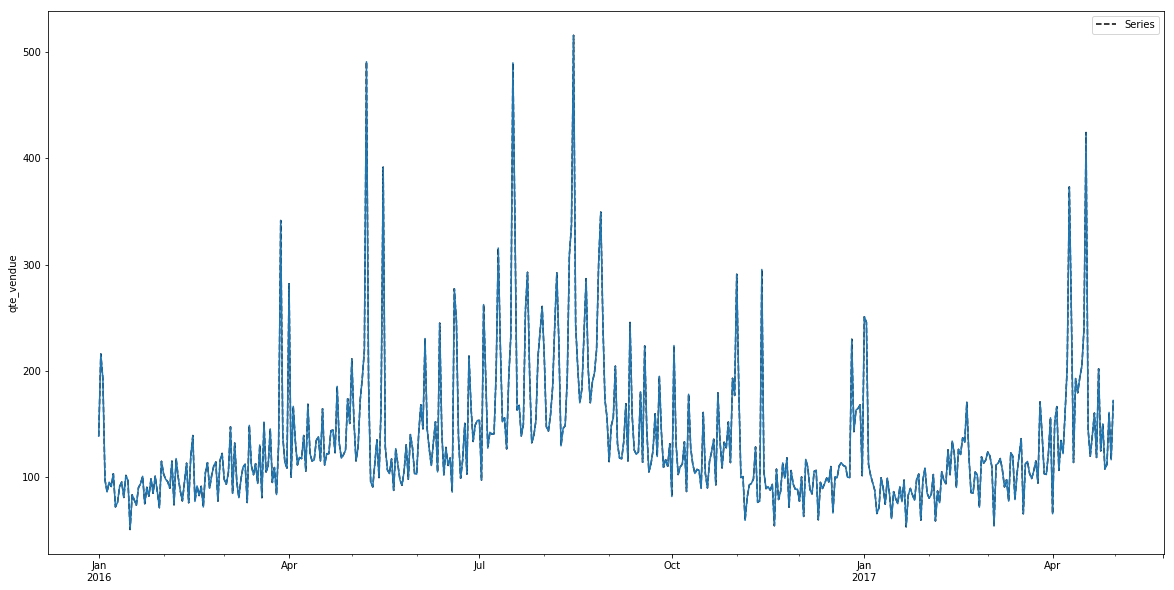

In [14]:
d = list(train[train.implant=='NF059473'].loc[:,['date','qte_article_vendue']].groupby('date').sum().loc[:,'qte_article_vendue'].index)

q = train[train.implant=='NF059473'].loc[:,['date','qte_article_vendue']].groupby('date').sum().loc[:,'qte_article_vendue'].get_values()


plt.figure(figsize=(20,10))
ts = pd.Series(q, index=pd.date_range('1/1/2016', periods=486))
plt.ylabel('qte_vendue')
plt.xlabel('time')
ts.plot(style='k--', label='Series'); plt.legend()
ax = ts.plot()
ax.set_title("Rouen's station sales over the years")

### Paris' station sales over the years :

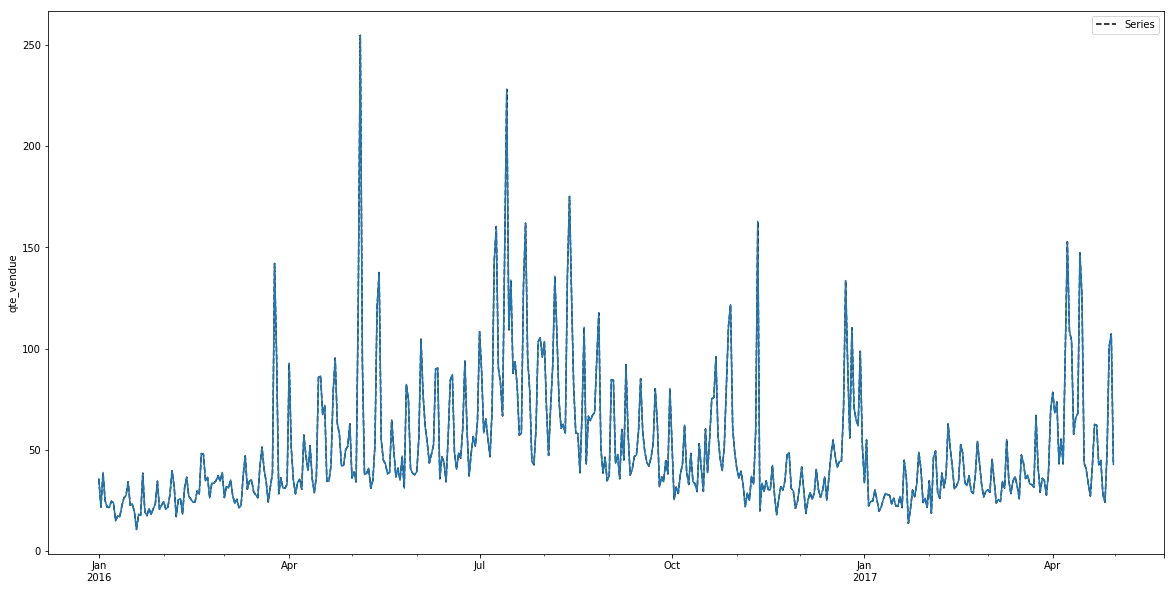

In [15]:
d = list(train[train.implant=='NF078544'].loc[:,['date','qte_article_vendue']].groupby('date').sum().loc[:,'qte_article_vendue'].index)

q = train[train.implant=='NF078544'].loc[:,['date','qte_article_vendue']].groupby('date').sum().loc[:,'qte_article_vendue'].get_values()


ax = plt.figure(figsize=(20,10))
ts = pd.Series(q, index=pd.date_range('1/1/2016', periods=486))
plt.ylabel('qte_vendue')
plt.xlabel('time')
ts.plot(style='k--', label='Series'); plt.legend()
ax.set_title("Paris' station sales over the years")
ts.plot()

### Sales per weekday :

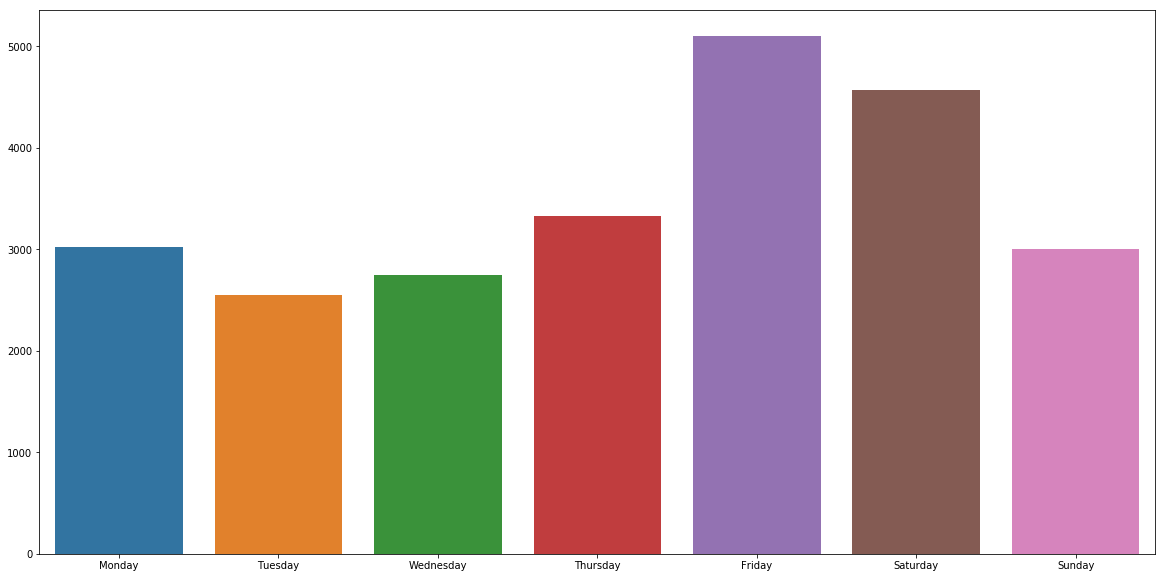

In [17]:
## Paris's station

#lP=train[train["implant"]=="NF078544"].groupby("article_nom")["qte_article_vendue"].sum()
#lR=train[train["implant"]=="NF059473"].groupby("article_nom")["qte_article_vendue"].sum()
days=train[train.implant=='NF078544'].loc[:,['day','qte_article_vendue']].groupby('day').sum().loc[:,'qte_article_vendue']

dd=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
qq=[days[days.index==i] for i in dd]

fig,(axis1)=plt.subplots(1,1,figsize=(20,10))
sns.barplot(x=dd,y=qq,ax=axis1)
axis1.xlabel("Day of the week")
axis1.ylabel("Quantity sold")
axis1.title("Sales per weekday in Paris' station")

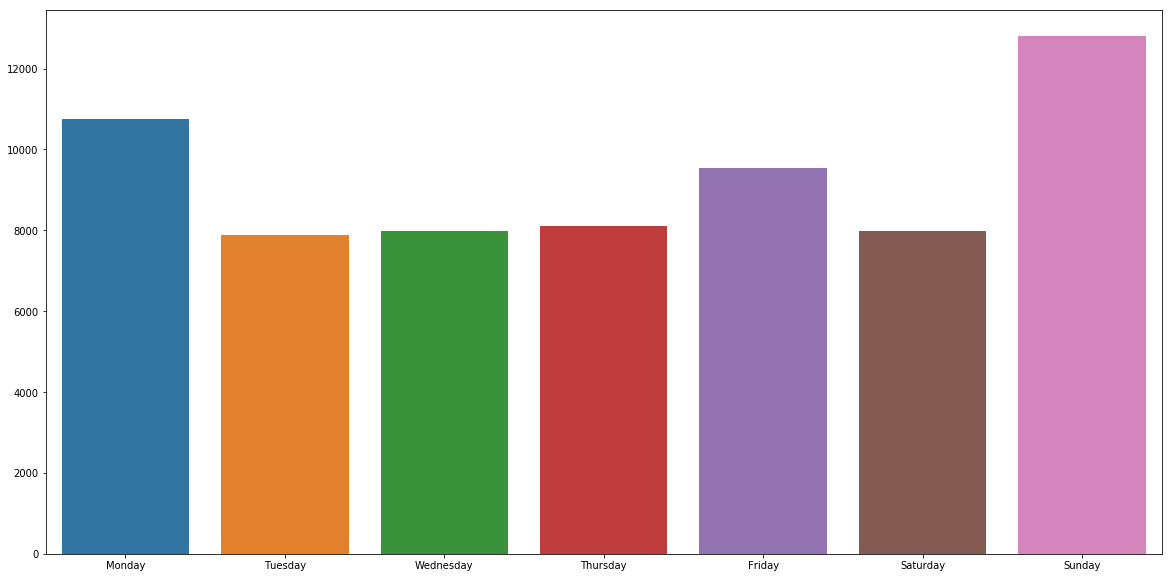

In [18]:
## Rouen's station

days=train[train.implant=='NF059473'].loc[:,['day','qte_article_vendue']].groupby('day').sum().loc[:,'qte_article_vendue']

dd=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
qq=[days[days.index==i] for i in dd]
fig,(axis1)=plt.subplots(1,1,figsize=(20,10))
sns.barplot(x=dd,y=qq,ax=axis1)

axis1.xlabel("Day of the week")
axis1.ylabel("Quantity sold")
axis1.title("Sales per weekday in Rouen's station")


# 3 - Exploratory Data Analysis :

<b> Why ? </b>

- To well know our learning data.
- Identify promising features.
- identify outliers and the corresponding treatment.

### A - Fetching the N most purchased products :

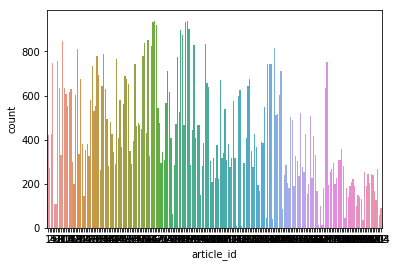

In [371]:
# This is a countplot of the most purchased products
fig,(axis1)=plt.subplots(1,1,figsize=(20,10))
sns.countplot(x='article_id',data=train[train['qte_article_vendue']!=0])

axis1.xlabel("Article id")
axis1.ylabel("Quantity sold")
axis1.title("Overall sales over the given dataset's time period")

In [ ]:
#Fetching the N most purchased products#
N=20
labels_freq_pd = itemfreq(train[train["qte_article_vendue"]!=0]["article_nom"])
labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
main_labels = labels_freq_pd[:,0][0:N]
print("Most {} purchased products are : {}".format(N,main_labels))


In [ ]:
#Creating the smaller dataset
s=train.article_nom.as_matrix()
t=s.reshape(s.shape[0],1)
t1=np.where(t==main_labels)[0]

train_=train.loc[t1,:]
train_.head(5)


<div class="alert alert-success">
    Dataset containing the twenty most purchased items created.
</div>

### B - Ploting sales per categories:

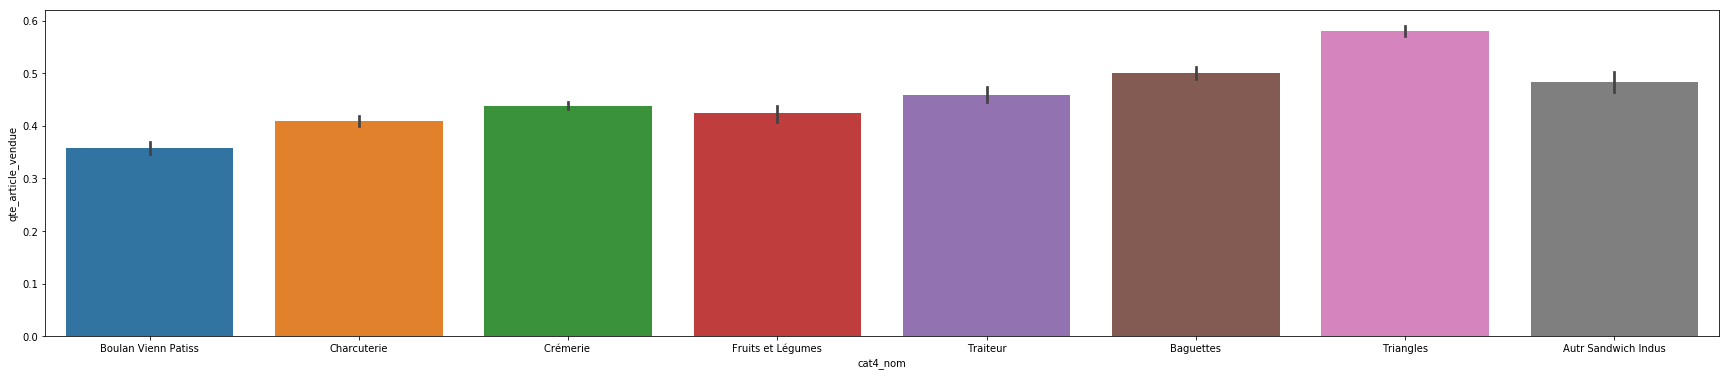

In [325]:
# ploting sales per cat4
fig,(axis1)=plt.subplots(1,1,figsize=(30,6))
sns.barplot(x='cat4_nom',y='qte_article_vendue',data=train,ax=axis1)
axis1.xlabel("Category name")
axis1.ylabel("Quantity sold")
axis1.title("Overall sales for category 4's items")

<div class="alert alert-success">
The above plot shows the sales of products per cat4 with the maximum for the Triangles category.
</div>

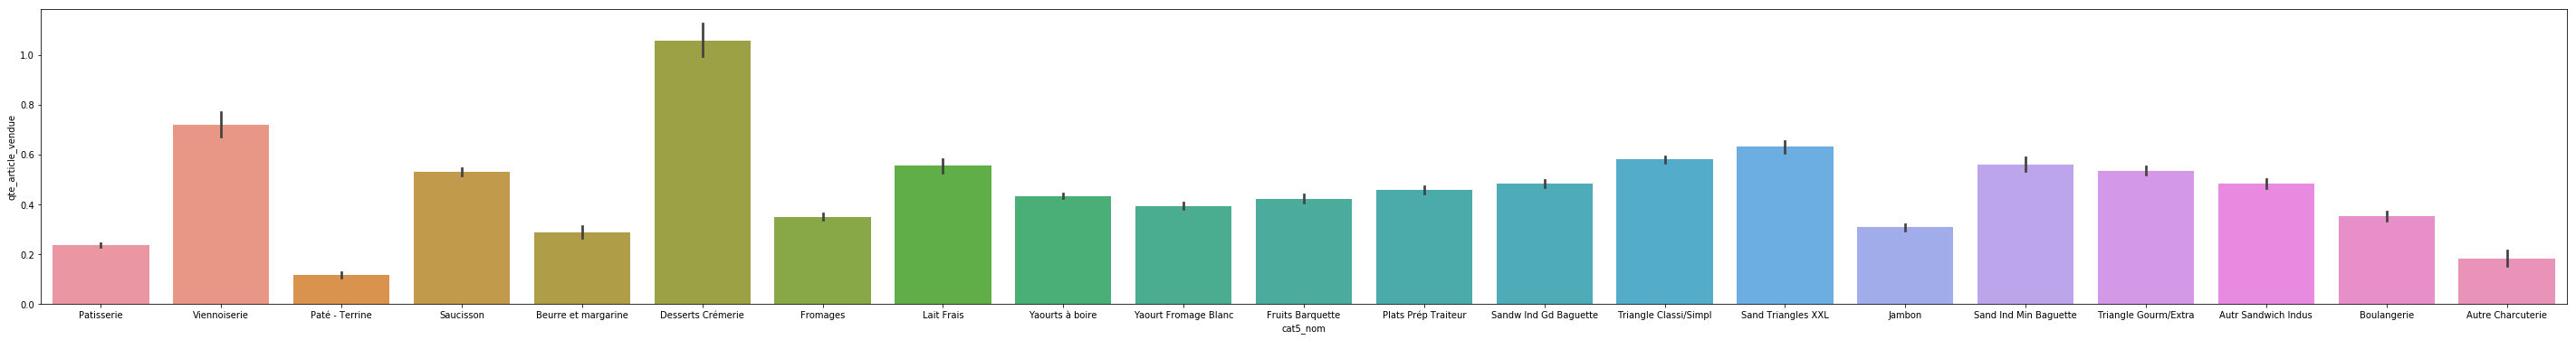

In [326]:
# ploting sales per cat5
fig,(axis1)=plt.subplots(1,1,figsize=(50,6))
sns.barplot(x='cat5_nom',y='qte_article_vendue',data=train,ax=axis1)
axis1.xlabel("Category name")
axis1.ylabel("Quantity sold")
axis1.title("Overall sales for category 5's items")

<div class="alert alert-success">
The above plot shows the sales of products per cat5 with the maximum for the Desserts Crémerie category.
</div>

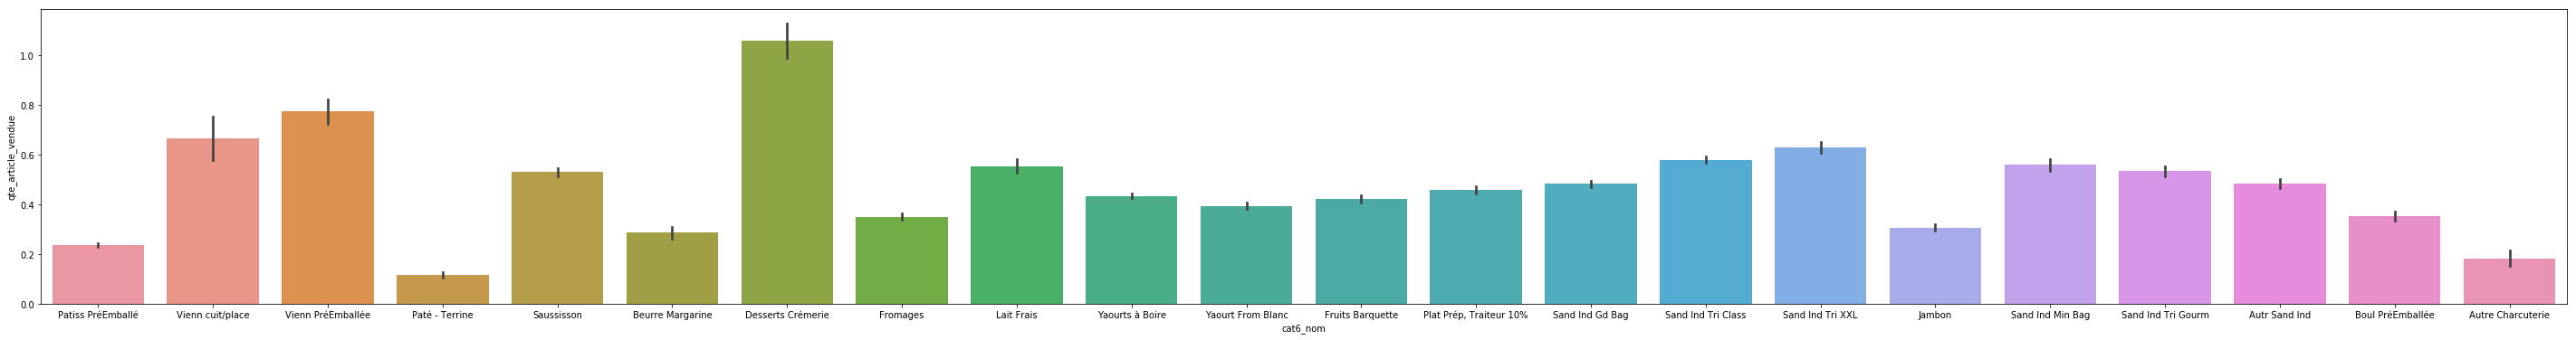

In [327]:
# ploting sales per cat6
fig,(axis1)=plt.subplots(1,1,figsize=(50,6))
sns.barplot(x='cat6_nom',y='qte_article_vendue',data=train,ax=axis1)
axis1.xlabel("Category name")
axis1.ylabel("Quantity sold")
axis1.title("Overall sales for category 6's items")

<div class="alert alert-success">
The above plot shows the sales of products per cat5 with the maximum for the Desserts Crémerie category.
</div>

<div class="alert alert-info">
    As we saw in the <b>Data Visualisation Notebook</b>:
    <ul><li> $cat6 \subset cat5 \subset cat4$</li></ul>
</div>

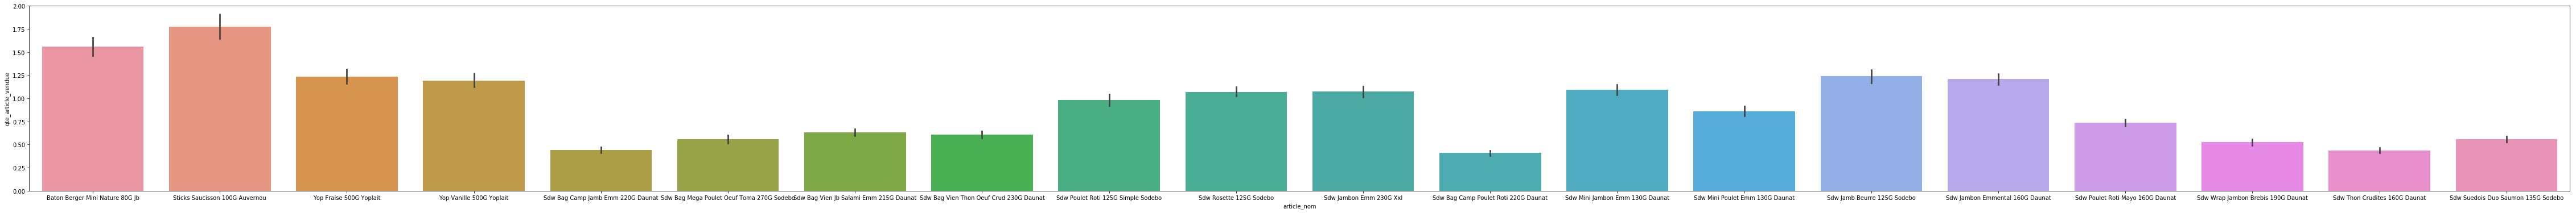

In [328]:
# ploting sales per product (just the 20 most puchased products)
fig,(axis1)=plt.subplots(1,1,figsize=(80,6))
sns.barplot(x='article_nom',y='qte_article_vendue',data=train.loc[t1,:],ax=axis1)
axis1.xlabel("Product name")
axis1.ylabel("Quantity sold")
axis1.title("The 20 most purchased item")

<div class="alert alert-success">
The above plot shows the most purchased products with the maximum for Sticks Saucisson 100G Auvernou.
</div>

### C - The effects of weather conditions on sales:

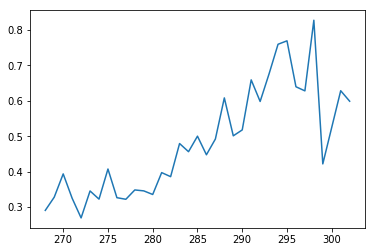

In [329]:
# Temperature effect:
train['t_9h_']=[int(i+0.5) for i in train.t_9h_rouen]
tt=train.groupby('t_9h_')['qte_article_vendue'].sum()
ratio_tt=tt/itemfreq(train.t_9h_)[:,1]
ax = plt.plot(ratio_tt)
train = train.drop('t_9h_',axis=1)

ax.xlabel("Temperature in K°")
ax.ylabel("Quantity sold")
ax.title("Effects of temperatures on sales")

<div class="alert alert-success">
The above plot shows that the sales increase when the weather is nice .
</div>

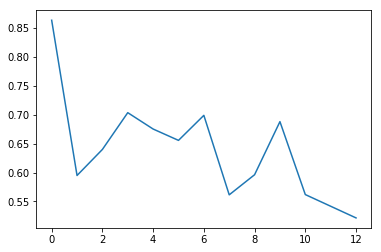

In [330]:
# Wind speed effect : 
train['ff_15h_']=[int(i+0.5) for i in train.ff_15h_rouen]
ff=train[train['implant']=='NF059473'].groupby('ff_15h_')['qte_article_vendue'].sum()
ratio_ff=ff/itemfreq(train[train['implant']=='NF059473'].ff_15h_)[:,1]
ax = plt.plot(ratio_ff)
train = train.drop('ff_15h_',axis=1)

ax.xlabel("Wind speed (Beaufort Scale)")
ax.ylabel("Quantity sold")
ax.title("Effects of wind speed on sales")

<div class="alert alert-success">
The above plot shows that the sales decrease when it's too windy.
</div>

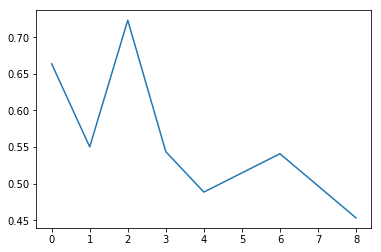

In [331]:
# Rain precipitation effect:
train['rr3_9h_']=[int(i+0.5) for i in train.rr3_9h_paris]
rr=train[train['implant']=='NF059473'].groupby('rr3_9h_')['qte_article_vendue'].sum()
ratio_rr=rr/itemfreq(train[train['implant']=='NF059473'].rr3_9h_)[:,1]
ax = plt.plot(ratio_rr)
train = train.drop('rr3_9h_',axis=1)

ax.xlabel("Precipitation in mm")
ax.ylabel("Quantity sold")
ax.title("Effects of precipitations on sales")

<div class="alert alert-success">
The above figure shows the effect of rain precipitation on sales.
</div>

In [3]:
# Nebulosity effect:
train['n_15h_']=[int(i+0.5) for i in train.n_15h_rouen]
nn=train[train['implant']=='NF059473'].groupby('n_15h_')['qte_article_vendue'].sum()
ratio_nn=nn/itemfreq(train[train['implant']=='NF059473'].n_15h_)[:,1]
ax = plt.plot(ratio_nn)
train = train.drop('n_15h_',axis=1)

ax.xlabel("Nebulosity (% of coverage)")
ax.ylabel("Quantity sold")
ax.title("Effects of temperatures on sales")

NameError: name 'train' is not defined

<div class="alert alert-success">
The above plot shows the effect of nebulosity on sales.

</div>

<div class= "alert alert-info">
As expected  Meterological conditions influence sales
</div>

### D - The effect of school holidays on sales at both stations :

In [333]:
## Rouen satation : 

RS = train[train['implant']=='NF059473'].groupby('holiday')['qte_article_vendue'].sum()
ratio_RS=RS/itemfreq(train[train['implant']=='NF059473'].holiday)[:,1]
fig,(axis1)=plt.subplots(1,1,figsize=(20,6))
sns.barplot(x=ratio_RS.index,y=ratio_RS.values,ax=axis1)
axis1.xlabel("Holidays")
axis1.ylabel("Quantity sold")
axis1.title("Effects of holidays in Rouen's station")

KeyError: 'holiday'

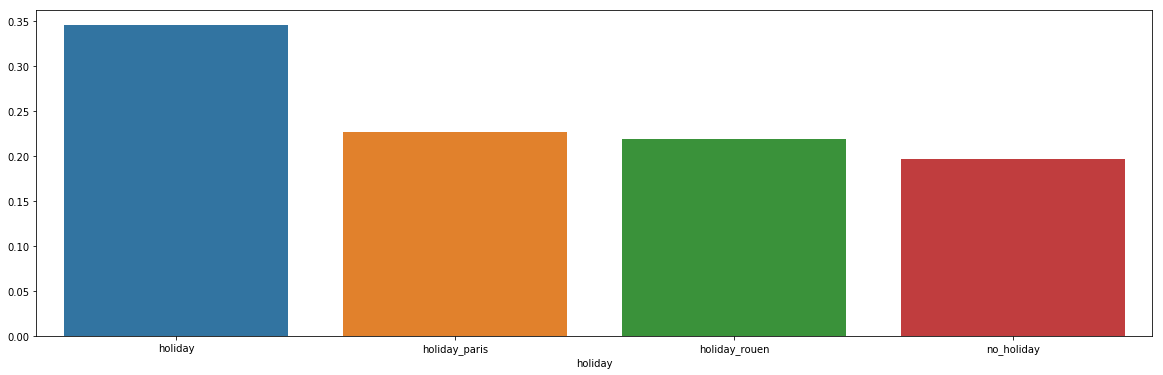

In [34]:
## Paris satation : 

PS = train[train['implant']=='NF078544'].groupby('holiday')['qte_article_vendue'].sum()
ratio_PS=PS/itemfreq(train[train['implant']=='NF078544'].holiday)[:,1]
fig,(axis1)=plt.subplots(1,1,figsize=(20,6))
sns.barplot(x=ratio_PS.index,y=ratio_PS.values,ax=axis1)

axis1.xlabel("Holidays")
axis1.ylabel("Quantity sold")
axis1.title("Effects of holidays in Paris' station")

# 4. Data Transformation Techniques

## What is One Hot Encoding?
A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

## Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.
Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [31]:
train.head(0)

,implant,date,article_nom,id_categorie_6,qte_article_vendue,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,cat4_nom,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6,article_id,holidays_Zone,departure,month,day,t_9h,t_15h,rr3_9h,rr3_15h,ff_9h,ff_15h,n_9h,n_15h


<div class= "alert alert-warning">
The smaller dataset $train\_$ was defined above
</div>

In [52]:
## wind speed is a categorical variable based on Beaufort scale:

train_['ff_15h']=[int(i+0.5) for i in train_.ff_15h]
train_['ff_9h']=[int(i+0.5) for i in train_.ff_9h]

## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['implant', 'ff_9h', 'ff_15h', 'cat4_nom', 'cat5_nom', 'cat6_nom',
                   'article_nom', 'month', 'day', 'retour_zone_1','retour_zone_2','retour_zone_3','retour_zone_4',
                   'retour_zone_5','retour_zone_6','aller_zone_1','aller_zone_2','aller_zone_3','aller_zone_4',
                   'aller_zone_5','aller_zone_6', "holidays_Zone", 'departure']

for var in dummy_variables:
    dummy = pd.get_dummies(train_[var], prefix = var, drop_first = False)
    train_ = pd.concat([train_, dummy], axis = 1)

drop_variables = dummy_variables + ['date','article_id','id_categorie_4','id_categorie_5','id_categorie_6']
train_ = train_.drop(drop_variables, axis = 1)

In [54]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19440 entries, 9 to 198222
Columns: 144 entries, qte_article_vendue to departure_no_departure
dtypes: float64(7), uint8(137)
memory usage: 3.7 MB


In [55]:
train_.head(5)

,qte_article_vendue,t_9h,n_9h,rr3_9h,t_15h,n_15h,rr3_15h,implant_NF059473,implant_NF078544,ff_9h_0,ff_9h_1,ff_9h_2,ff_9h_3,ff_9h_4,ff_9h_5,ff_9h_6,ff_9h_7,ff_9h_8,ff_9h_9,ff_9h_10,ff_9h_11,ff_15h_0,ff_15h_1,ff_15h_2,ff_15h_3,ff_15h_4,ff_15h_5,ff_15h_6,ff_15h_7,ff_15h_8,ff_15h_9,ff_15h_10,ff_15h_12,cat4_nom_Autr Sandwich Indus,cat4_nom_Baguettes,cat4_nom_Charcuterie,cat4_nom_Crémerie,cat4_nom_Triangles,cat5_nom_Autr Sandwich Indus,cat5_nom_Sand Ind Min Baguette,cat5_nom_Sand Triangles XXL,cat5_nom_Sandw Ind Gd Baguette,cat5_nom_Saucisson,cat5_nom_Triangle Classi/Simpl,cat5_nom_Yaourts à boire,cat6_nom_Autr Sand Ind,cat6_nom_Sand Ind Gd Bag,cat6_nom_Sand Ind Min Bag,cat6_nom_Sand Ind Tri Class,cat6_nom_Sand Ind Tri XXL,cat6_nom_Saussisson,cat6_nom_Yaourts à Boire,article_nom_Baton Berger Mini Nature 80G Jb,article_nom_Sdw Bag Camp Jamb Emm 220G Daunat,article_nom_Sdw Bag Camp Poulet Roti 220G Daunat,article_nom_Sdw Bag Mega Poulet Oeuf Toma 270G Sodebo,article_nom_Sdw Bag Vien Jb Salami Emm 215G Daunat,article_nom_Sdw Bag Vien Thon Oeuf Crud 230G Daunat,article_nom_Sdw Jamb Beurre 125G Sodebo,article_nom_Sdw Jambon Emm 230G Xxl,article_nom_Sdw Jambon Emmental 160G Daunat,article_nom_Sdw Mini Jambon Emm 130G Daunat,article_nom_Sdw Mini Poulet Emm 130G Daunat,article_nom_Sdw Poulet Roti 125G Simple Sodebo,article_nom_Sdw Poulet Roti Mayo 160G Daunat,article_nom_Sdw Rosette 125G Sodebo,article_nom_Sdw Suedois Duo Saumon 135G Sodebo,article_nom_Sdw Thon Crudites 160G Daunat,article_nom_Sdw Wrap Jambon Brebis 190G Daunat,article_nom_Sticks Saucisson 100G Auvernou,article_nom_Yop Fraise 500G Yoplait,article_nom_Yop Vanille 500G Yoplait,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,retour_zone_1_0,retour_zone_1_1,retour_zone_1_2,retour_zone_2_0,retour_zone_2_1,retour_zone_2_2,retour_zone_3_0,retour_zone_3_1,retour_zone_3_2,retour_zone_4_0,retour_zone_4_1,retour_zone_4_2,retour_zone_5_0,retour_zone_5_1,retour_zone_5_2,retour_zone_6_0,retour_zone_6_1,retour_zone_6_2,retour_zone_6_3,aller_zone_1_0,aller_zone_1_1,aller_zone_1_2,aller_zone_1_3,aller_zone_2_0,aller_zone_2_1,aller_zone_2_2,aller_zone_2_3,aller_zone_3_0,aller_zone_3_1,aller_zone_3_2,aller_zone_3_3,aller_zone_4_0,aller_zone_4_1,aller_zone_4_2,aller_zone_4_3,aller_zone_5_0,aller_zone_5_1,aller_zone_5_2,aller_zone_5_3,aller_zone_6_0,aller_zone_6_1,aller_zone_6_2,aller_zone_6_3,holidays_Zone_holidaysA,holidays_Zone_holidaysAB,holidays_Zone_holidaysABC,holidays_Zone_holidaysAC,holidays_Zone_holidaysB,holidays_Zone_holidaysBC,holidays_Zone_holidaysC,holidays_Zone_no_holidays,departure_departure,departure_no_departure
9,3.32,278.25,100.0,0.2,280.05,100.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
18,2.91,278.25,100.0,0.2,280.05,100.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
30,1.39,278.25,100.0,0.2,280.05,100.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
34,4.17,278.25,100.0,0.2,280.05,100.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0

<div class= "alert alert-info">
We have here all the columns that will be used in the modelisation part. We still need to normalize the data (Some model such as linear model are more efficient, and others such as neural network don't work without it. 
</div>

In [56]:
#Ratio variables that need to be scaled
scalable_variables = ['qte_article_vendue', 't_9h', 'n_9h', 'rr3_9h', 't_15h', 'n_15h', 'rr3_15h']
                     #,'t_9h_paris', 'n_9h_paris', 'rr3_9h_paris', 't_15h_paris', 'n_15h_paris', 'rr3_15h_paris']

for var in scalable_variables:
    mini, maxi = train_[var].min(), train_[var].max()
    train_.loc[:,var] = (train_[var] - mini) / (maxi - mini)

In [57]:
print('Shape : ', train_.shape)
train_.sample(10)

Shape :  (19440, 144)


,qte_article_vendue,t_9h,n_9h,rr3_9h,t_15h,n_15h,rr3_15h,implant_NF059473,implant_NF078544,ff_9h_0,ff_9h_1,ff_9h_2,ff_9h_3,ff_9h_4,ff_9h_5,ff_9h_6,ff_9h_7,ff_9h_8,ff_9h_9,ff_9h_10,ff_9h_11,ff_15h_0,ff_15h_1,ff_15h_2,ff_15h_3,ff_15h_4,ff_15h_5,ff_15h_6,ff_15h_7,ff_15h_8,ff_15h_9,ff_15h_10,ff_15h_12,cat4_nom_Autr Sandwich Indus,cat4_nom_Baguettes,cat4_nom_Charcuterie,cat4_nom_Crémerie,cat4_nom_Triangles,cat5_nom_Autr Sandwich Indus,cat5_nom_Sand Ind Min Baguette,cat5_nom_Sand Triangles XXL,cat5_nom_Sandw Ind Gd Baguette,cat5_nom_Saucisson,cat5_nom_Triangle Classi/Simpl,cat5_nom_Yaourts à boire,cat6_nom_Autr Sand Ind,cat6_nom_Sand Ind Gd Bag,cat6_nom_Sand Ind Min Bag,cat6_nom_Sand Ind Tri Class,cat6_nom_Sand Ind Tri XXL,cat6_nom_Saussisson,cat6_nom_Yaourts à Boire,article_nom_Baton Berger Mini Nature 80G Jb,article_nom_Sdw Bag Camp Jamb Emm 220G Daunat,article_nom_Sdw Bag Camp Poulet Roti 220G Daunat,article_nom_Sdw Bag Mega Poulet Oeuf Toma 270G Sodebo,article_nom_Sdw Bag Vien Jb Salami Emm 215G Daunat,article_nom_Sdw Bag Vien Thon Oeuf Crud 230G Daunat,article_nom_Sdw Jamb Beurre 125G Sodebo,article_nom_Sdw Jambon Emm 230G Xxl,article_nom_Sdw Jambon Emmental 160G Daunat,article_nom_Sdw Mini Jambon Emm 130G Daunat,article_nom_Sdw Mini Poulet Emm 130G Daunat,article_nom_Sdw Poulet Roti 125G Simple Sodebo,article_nom_Sdw Poulet Roti Mayo 160G Daunat,article_nom_Sdw Rosette 125G Sodebo,article_nom_Sdw Suedois Duo Saumon 135G Sodebo,article_nom_Sdw Thon Crudites 160G Daunat,article_nom_Sdw Wrap Jambon Brebis 190G Daunat,article_nom_Sticks Saucisson 100G Auvernou,article_nom_Yop Fraise 500G Yoplait,article_nom_Yop Vanille 500G Yoplait,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,retour_zone_1_0,retour_zone_1_1,retour_zone_1_2,retour_zone_2_0,retour_zone_2_1,retour_zone_2_2,retour_zone_3_0,retour_zone_3_1,retour_zone_3_2,retour_zone_4_0,retour_zone_4_1,retour_zone_4_2,retour_zone_5_0,retour_zone_5_1,retour_zone_5_2,retour_zone_6_0,retour_zone_6_1,retour_zone_6_2,retour_zone_6_3,aller_zone_1_0,aller_zone_1_1,aller_zone_1_2,aller_zone_1_3,aller_zone_2_0,aller_zone_2_1,aller_zone_2_2,aller_zone_2_3,aller_zone_3_0,aller_zone_3_1,aller_zone_3_2,aller_zone_3_3,aller_zone_4_0,aller_zone_4_1,aller_zone_4_2,aller_zone_4_3,aller_zone_5_0,aller_zone_5_1,aller_zone_5_2,aller_zone_5_3,aller_zone_6_0,aller_zone_6_1,aller_zone_6_2,aller_zone_6_3,holidays_Zone_holidaysA,holidays_Zone_holidaysAB,holidays_Zone_holidaysABC,holidays_Zone_holidaysAC,holidays_Zone_holidaysB,holidays_Zone_holidaysBC,holidays_Zone_holidaysC,holidays_Zone_no_holidays,departure_departure,departure_no_departure
6385,0.054432,0.465116,0.990099,0.0,0.396465,0.990099,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
137554,0.012042,0.311047,0.990099,0.0,0.313131,0.990099,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
92901,0.000000,0.409884,0.990099,0.0,0.320707,0.990099,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
177949,0.024085,0.023256,0.990099,0.0,0.133838,0.990099,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1

<div class= "alert alert-info">
This is the latest version of the dataset that'll be used.<br>
We'll split the dataset into two dataset :
    <ul><li>Train dataset : X </li> <li> Test dataset : y</li> </ul>
</div>

In [59]:
#train database without unit_sales
train_ = train_.reset_index(drop=True)  #we reset the index
y = train_['qte_article_vendue']
X = train_.drop(['qte_article_vendue'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)


Shape X : (19440, 143)
Shape y : (19440,)


In [60]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15) #  split will be always the same
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (15552, 143)
y_train shape : (15552,)
X_test shape : (3888, 143)
y_test shape : (3888,)


<div class= "alert alert-success">
Train and test datasets successfully created
</div>

# 5 - Regression Model fitting techniques.

### A - Linear Regression :

#### Linear Regression

Linear Regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). 

In [61]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [62]:
# Print the coefficients
print (results.intercept_, results.coef_)

457178652738.7569 [-4.51351792e-03 -5.03291537e-03  9.69889972e-03  2.34871610e-02
 -5.22876711e-04  2.44031760e-03 -1.60698699e+11 -1.60698699e+11
 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10
 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10
 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10 -5.50362719e+10
 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10
 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10
 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10 -7.80955795e+10
 -2.23358173e+11 -6.98093259e+11  4.49709719e+11 -1.43667077e+11
 -4.25214313e+11 -1.20663448e+11  5.24860843e+11 -2.32100886e+11
  3.17096385e+11 -8.63384425e+11  8.25423278e+10  5.05338770e+10
  2.72911365e+10  1.67879872e+11  2.19462504e+11  5.41043327e+10
  2.79040076e+11  2.60326559e+11  6.47316542e+10 -6.17919935e+10
 -2.02313715e+09 -2.02313715e+09 -2.02313715e+09 -2.02313715e+09
 -2.02313715e+09  7.34275120e+10  1.63134982e+11  7.34275120e+10
 -2.613

In [63]:
y_pred=model.predict(X_test)

In [64]:
print(' RMSE score : ',mean_squared_error(y_pred,y_test)**0.5, ' / 0.0')

 RMSE score :  0.04135523584498831  / 0.0


In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.347 which is poor for model to be predicted
#on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     qte_article_vendue   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     86.94
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:10:29   Log-Likelihood:                 28109.
No. Observations:               15552   AIC:                        -5.602e+04
Df Residuals:                   15454   BIC:                        -5.527e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
t_9h                                                     -0.0045      0.007     -0.608      0.543      -0.019       0.010
n_9h                                                     -0.0050      0.002     -3.117      0.002      -0.008      -0.002
rr3_9h                                                    0.0105      0.005      2.181      0.029       0.001       0.020
t_15h                                                     0.0231      0.008      2.911      0.004       0.008       0.039
n_15h                                                    -0.0004      0.002     -0.204      0.838      -0.004       0.003
rr3_15h                                                   0.0032      0.005      0.683      0.494      -0.006       0.012
implant_NF059473                                          0.0215      0.000     43.488      0.000       0.021       0.022
implant_NF078544                                         -0.0069      0.000    -13.880      0.000      -0.008      -0.006
ff_9h_0                                                   0.0058      0.003      2.013      0.044       0.000       0.011
ff_9h_1                                                   0.0025      0.002      1.631      0.103      -0.001       0.006
ff_9h_2                                               -5.221e-05      0.001     -0.040      0.968      -0.003       0.003
ff_9h_3                                                 8.58e-05      0.001      0.072      0.943      -0.002       0.002
ff_9h_4                                                   0.0022      0.001      1.846      0.065      -0.000       0.004
ff_9h_5                                                   0.0028      0.001      2.182      0.029       0.000       0.005
ff_9h_6                                                   0.0029      0.001      2.107      0.035       0.000       0.006
ff_9h_7                                                   0.0008      0.002      0.480      0.631      -0.002       0.004
ff_9h_8                                                   0.0017      0.002      0.797      0.426      -0.002       0.006
ff_9h_9                                                   0.0009      0.004      0.208      0.835      -0.007       0.009
ff_9h_10                                                 -0.0006      0.004     -0.159      0.874      -0.008       0.007
ff_9h_11                                                 -0.0042      0.007     -0.628      0.530      -0.017       0.009
ff_15h_0                                                  0.0098      0.006      1.757      0.079      -0.001       0.021
ff_15h_1                                                 -0.0037      0.002     -2.005      0.045      -0.007   -8.29e-05
ff_15h_2                         

<div class= "alert alert-success">
Normalized RMSE score :  0.04135523584498831
</div>

# The Linear regression model gives a low R- square value of 0.354


### B - DecisionTree Regressor :

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [66]:
dtr=DecisionTreeRegressor(max_depth=1000,min_samples_leaf=20,max_leaf_nodes=100)

In [67]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5 , '/ 0.0')

##using a decision tree greatly improves the accurancy of model prediction.

R2 score =  0.44892042224732465 / 1.0
RMSE score =  0.03764912690710102 / 0.0


<div class= "alert alert-success">
R2 score =  0.44892042224732465 <br>
Normalized RMSE score =  0.03764912690710102 
</div>

### C - ExtraTreesRegressor :

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.


<i>max_features is the size of the random subsets of features to consider when splitting a node.</i>

In [70]:
etr = ExtraTreesRegressor(n_jobs=-1)

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.3min finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=15,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=5, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score =  0.49844215686693816 / 1.0
RMSE score =  0.035917678918975515 / 0.0


<div class= "alert alert-success">
R2 score =  0.49844215686693816 <br>
RMSE score =  0.035917678918975515 
</div>

### D - Random Forest Regressor

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [72]:
# Choose the type of classifier. 
RFR = RandomForestRegressor(n_jobs=-1)

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }



#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score =  0.5252877321347164 / 1.0
RMSE score =  0.034943224495440524 / 0.0


In depth gridsearch

In [101]:
RFR = RandomForestRegressor(n_jobs=-1)

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [10,50,100], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,15]
             }



#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [102]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score =  0.5329420361819849 / 1.0
RMSE score =  0.03466036577714777 / 0.0


<div class= "alert alert-success">
R2 score =  0.5329420361819849 <br>
RMSE score =  0.03466036577714777 
</div>

### E - Gradient Boosting Regressor :

The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
Hypothesis boosting was the idea of filtering observations, leaving those observations that the weak learner can handle and focusing on developing new weak learns to handle the remaining difficult observations.

#### How Gradient Boosting Works :

Gradient boosting involves three elements:

-- A loss function to be optimized.

-- A weak learner to make predictions.

-- An additive model to add weak learners to minimize the loss function.

In [392]:
gbr = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=150,max_depth=10,min_samples_split=5)


parameters = {'n_estimators': [5,15,150],
              'loss':['ls','huber'],
              'criterion': ['mse'],
              'max_depth': [10,15], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 74.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 85.9min finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [393]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score using Gradient Boosting=  0.5185993250101765 / 1.0
RMSE score using Gradient Boosting=  0.03518852786381422 / 0.0


<div class= "alert alert-success">
R2 score =  0.5185993250101765 <br>
RMSE score =  0.03518852786381422 
</div>

### F - XGBOOST

XGBoost (eXtreme Gradient Boosting) is a direct application of Gradient Boosting for decision trees

Main advantages are as follows:
1. Easy to use
2. Computational efficiency
3. Model Accuracy
4. Feasibility — easy to tune parameters and modify objectives.

In [103]:
xgb=XGBRegressor(max_depth=10, n_jobs=-1)

In [104]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
y_pred=xgb.predict(X_test)

In [106]:
print('R2 score using XG Boost= ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score using XG Boost= ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score using XG Boost=  0.542778223843609 / 1.0
RMSE score using XG Boost=  0.03429345202433165 / 0.0


<div class= "alert alert-success">
R2 score =  0.542778223843609 <br>
RMSE score =  0.03429345202433165 
</div>

<div class= "alert alert-info">
    RF / XGBoost give almost the same results
</div>

# 6 - Creating a neural network

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function  by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output.

The advantages of Multi-layer Perceptron are:

-- Capability to learn non-linear models.

-- Capability to learn models in real-time (on-line learning) using partial_fit.

In [107]:
# Convert data as np.array
features = np.array(X_train)
#targets = np.array(y_train.reshape(y_train.shape[0],1))
targets = np.array(y_train.values.reshape(y_train.shape[0],1))
features_validation= np.array(X_test)
#targets_validation = np.array(y_test.reshape(y_test.shape[0],1))
targets_validation = np.array(y_test.values.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[0.90144928 0.88413098 0.         ... 1.         0.         1.        ]
 [0.68115942 0.58690176 0.01680672 ... 1.         0.         1.        ]
 [0.53333333 0.43828715 0.         ... 1.         0.         1.        ]
 ...
 [0.42898551 0.46599496 0.         ... 0.         0.         1.        ]
 [0.39710145 0.31989924 0.         ... 1.         0.         1.        ]
 [0.13333333 0.16372796 0.         ... 1.         0.         1.        ]]
[[0.06984586]
 [0.03660886]
 [0.        ]
 [0.04479769]
 [0.        ]
 [0.01830443]
 [0.12186898]
 [0.04238921]
 [0.02890173]
 [0.04238921]]


In [108]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
___________________

Instructions for updating:
Use tf.cast instead.
Step :  0 / 1000
15552/15552 [==============================] - 0s 12us/step
Training MSE: 0.0007044562945739317
3888/3888 [==============================] - 0s 11us/step
Validation MSE: 0.0013154672846579427 

Step :  250 / 1000
15552/15552 [==============================] - 0s 11us/step
Training MSE: 0.0006514470276917204
3888/3888 [==============================] - 0s 11us/step
Validation MSE: 0.0013443992306466823 

Step :  500 / 1000
15552/15552 [==============================] - 0s 11us/step
Training MSE: 0.0006264054592877987
3888/3888 [==============================] - 0s 12us/step
Validation MSE: 0.0013581034493845325 

Step :  750 / 1000
15552/15552 [==============================] - 0s 10us/step
Training MSE: 0.0005628418179402327
3888/3888 [==============================] - 0s 11us/step
Validation MSE: 0.0013897746658611875 



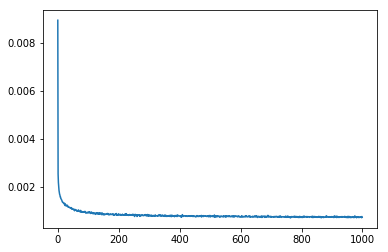

In [109]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [110]:
y_pred = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

R2 score =  0.45968268172569193 / 1.0
RMSE score =  0.03727968161769939 / 0.0


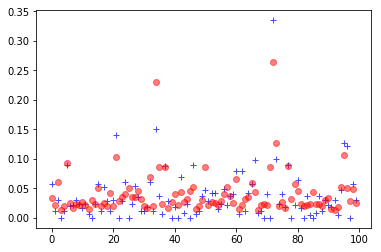

In [111]:
#Lets plot the  first 50 predictions
plt.plot(y_test.as_matrix()[0:100], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:100], 'ro', color ='red', alpha=0.5)
plt.show()

<div class= "alert alert-success">
R2 score =  0.45968268172569193 <br>
RMSE score =  0.03727968161769939 
</div>

# 7 - Stacking :

### <b> What is Stacking ? </b>

Stacking is a machine learning ensembling technique. Main idea is to use predictions as features.
More specifically we predict train set (in CV-like fashion) and test set using some 1st level model(s), 
and then use these predictions as features for 2nd level model.

### <b> Why Stacking ? </b>

The stacked model is able to discern where each model performs well and where each model performs poorly. 

#### <i> Initialize 1st level models : </i>

In [112]:
models = [etr, RFR, xgb] 

#### <i> Perform stacking : </i>

In [113]:
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=True,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=mean_squared_error, # metric: callable
                           n_folds=4,                  # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [ExtraTreesRegressor]
    fold  0:  [0.00143131]
    fold  1:  [0.00117807]
    fold  2:  [0.00133260]
    fold  3:  [0.00135866]
    ----
    MEAN:     [0.00132516] + [0.00009231]
    FULL:     [0.00132516]

model  1:     [RandomForestRegressor]
    fold  0:  [0.00135314]
    fold  1:  [0.00108319]
    fold  2:  [0.00121015]
    fold  3:  [0.00124801]
    ----
    MEAN:     [0.00122362] + [0.00009653]
    FULL:     [0.00122362]

model  2:     [XGBRegressor]
    fold  0:  [0.00142173]
    fold  1:  [0.00113503]
    fold  2:  [0.00123426]
    fold  3:  [0.00131153]
    ----
    MEAN:     [0.00127564] + [0.00010502]
    FULL:     [0.00127564]



#### <i> Look at the result : </i>

So now we have OOF from 1st level models and we can build 2nd level model.
But first let's look at the result.
We have three 1st level models, so we expect to get three columns in S_train and S_test.

In [114]:
S_train[:5]

array([[0.04579417, 0.06721099, 0.09880793],
       [0.03150922, 0.0336319 , 0.02632532],
       [0.06635346, 0.07262125, 0.05585366],
       [0.06611091, 0.07330953, 0.07456452],
       [0.04214167, 0.03601136, 0.04136074]])

In [115]:
S_test[:5]

array([[0.06757878, 0.07659144, 0.06603319],
       [0.01993728, 0.02179924, 0.02529734],
       [0.06500895, 0.05699748, 0.05833031],
       [0.00833655, 0.00853915, 0.00821576],
       [0.01323837, 0.01474514, 0.00802102]])

#### <i> Concatenation : </i>

In [116]:
S_train_ = X_train
S_train_['M1'] = S_train[:,0]
S_train_['M2'] = S_train[:,1]
S_train_['M3'] = S_train[:,2]

In [117]:
S_test_ = X_test
S_test_['M1'] = S_test[:,0]
S_test_['M2'] = S_test[:,1]
S_test_['M3'] = S_test[:,2]

In [118]:
S_train_.head(5)

,t_9h,t_15h,rr3_9h,rr3_15h,n_9h,n_15h,implant_NF059473,implant_NF078544,ff_9h_0,ff_9h_1,ff_9h_2,ff_9h_3,ff_9h_4,ff_9h_5,ff_9h_6,ff_9h_7,ff_9h_8,ff_9h_9,ff_9h_10,ff_9h_11,ff_9h_12,ff_15h_0,ff_15h_1,ff_15h_2,ff_15h_3,ff_15h_4,ff_15h_5,ff_15h_6,ff_15h_7,ff_15h_8,ff_15h_9,ff_15h_10,ff_15h_11,ff_15h_12,cat4_nom_Autr Sandwich Indus,cat4_nom_Baguettes,cat4_nom_Charcuterie,cat4_nom_Crémerie,cat4_nom_Triangles,cat5_nom_Autr Sandwich Indus,cat5_nom_Sand Ind Min Baguette,cat5_nom_Sand Triangles XXL,cat5_nom_Sandw Ind Gd Baguette,cat5_nom_Saucisson,cat5_nom_Triangle Classi/Simpl,cat5_nom_Yaourts à boire,cat6_nom_Autr Sand Ind,cat6_nom_Sand Ind Gd Bag,cat6_nom_Sand Ind Min Bag,cat6_nom_Sand Ind Tri Class,cat6_nom_Sand Ind Tri XXL,cat6_nom_Saussisson,cat6_nom_Yaourts à Boire,article_nom_Baton Berger Mini Nature 80G Jb,article_nom_Sdw Bag Camp Jamb Emm 220G Daunat,article_nom_Sdw Bag Camp Poulet Roti 220G Daunat,article_nom_Sdw Bag Mega Poulet Oeuf Toma 270G Sodebo,article_nom_Sdw Bag Vien Jb Salami Emm 215G Daunat,article_nom_Sdw Bag Vien Thon Oeuf Crud 230G Daunat,article_nom_Sdw Jamb Beurre 125G Sodebo,article_nom_Sdw Jambon Emm 230G Xxl,article_nom_Sdw Jambon Emmental 160G Daunat,article_nom_Sdw Mini Jambon Emm 130G Daunat,article_nom_Sdw Mini Poulet Emm 130G Daunat,article_nom_Sdw Poulet Roti 125G Simple Sodebo,article_nom_Sdw Poulet Roti Mayo 160G Daunat,article_nom_Sdw Rosette 125G Sodebo,article_nom_Sdw Suedois Duo Saumon 135G Sodebo,article_nom_Sdw Thon Crudites 160G Daunat,article_nom_Sdw Wrap Jambon Brebis 190G Daunat,article_nom_Sticks Saucisson 100G Auvernou,article_nom_Yop Fraise 500G Yoplait,article_nom_Yop Vanille 500G Yoplait,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,retour_zone_1_0,retour_zone_1_1,retour_zone_1_2,retour_zone_2_0,retour_zone_2_1,retour_zone_2_2,retour_zone_3_0,retour_zone_3_1,retour_zone_3_2,retour_zone_4_0,retour_zone_4_1,retour_zone_4_2,retour_zone_5_0,retour_zone_5_1,retour_zone_5_2,retour_zone_6_0,retour_zone_6_1,retour_zone_6_2,retour_zone_6_3,aller_zone_1_0,aller_zone_1_1,aller_zone_1_2,aller_zone_1_3,aller_zone_2_0,aller_zone_2_1,aller_zone_2_2,aller_zone_2_3,aller_zone_3_0,aller_zone_3_1,aller_zone_3_2,aller_zone_3_3,aller_zone_4_0,aller_zone_4_1,aller_zone_4_2,aller_zone_4_3,aller_zone_5_0,aller_zone_5_1,aller_zone_5_2,aller_zone_5_3,aller_zone_6_0,aller_zone_6_1,aller_zone_6_2,aller_zone_6_3,holidays_A_holiday,holidays_A_no_holiday,holidays_B_holiday,holidays_B_no_holiday,holidays_C_holiday,holidays_C_no_holiday,departure_departure,departure_no_departure,M1,M2,M3
5134,0.901449,0.884131,0.000000,0.000000,0.891089,0.742574,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0.045794,0.067211,0.098808
12504,0.681159,0.586902,0.016807,0.000000,0.891089,0.891089,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0.031509,0.033632,0.026325
3055,0.533333,0.438287,0.000000,0.000000,0.990099,0.990099,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0.066353,0.072621,0.055854
2243,0.486957,0.423174,0.000000,0.007435,0.990099,0.990099,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0

In [103]:
y_train.head(5)

52308     0.069846
127558    0.036609
31093     0.000000
22882     0.044798
18442     0.000000
Name: qte_article_vendue, dtype: float64

#### <i> Application of the 2nd level model : </i>

In [119]:
# Initialize 2nd level model
model = XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                     n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model = model.fit(S_train_, y_train)

In [122]:
# Predict
y_pred = model.predict(S_test_)

# Final prediction score
print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

RMSE score =  0.034949734591872186 / 0.0


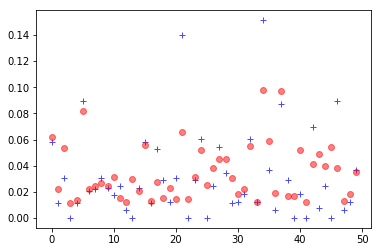

In [124]:
#Lets plot the  first 50 predictions
plt.plot(y_test.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.show()

<div class = "alert alert-success">
RMSE score =  0.034949734591872186   
</div>

[2016, 1, 1]

# Try on all data :

<div class = "alert alert-info">
    After seeing on a small subset, we're applying all the methods to the overall dataset. We need to apply some transformation (such as One hot encoding) to the entire dataset.
</div>

In [68]:
train.head(5)

,implant,date,article_nom,id_categorie_6,qte_article_vendue,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,cat4_nom,t_9h,n_9h,rr3_9h,ff_9h,t_15h,n_15h,rr3_15h,ff_15h,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6,article_id,holidays_Zone,departure,month,day
0,NF059473,2016-01-01,Cookie Cara Noix Pecan 70G Michel Augustin,1001672,0.56,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,278.25,100.0,0.2,4.0,280.05,100.0,0.0,7.6,0,0,0,0,0,0,0,0,0,0,0,0,1,no_holidays,no_departure,1,Friday
1,NF059473,2016-01-01,Cookie Choc Blc 70G Michel Augustin,1001672,1.11,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,278.25,100.0,0.2,4.0,280.05,100.0,0.0,7.6,0,0,0,0,0,0,0,0,0,0,0,0,2,no_holidays,no_departure,1,Friday
2,NF059473,2016-01-01,Cookie Choc Nois 70G Michel Augustin,1001672,0.56,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,278.25,100.0,0.2,4.0,280.05,100.0,0.0,7.6,0,0,0,0,0,0,0,0,0,0,0,0,3,no_holidays,no_departure,1,Friday
3,NF059473,2016-01-01,Cookie Choco 70G Michel Augustin,1001672,0.56,1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,278.25,100.0,0.2,4.0,280.05,100.0,0.0,7.6,0,0,0,0,0,0,0,0,0,0,0,0,4,no_holidays,no_departure,1,Friday
4,NF059473,2016-01-01,Croissant 60G Cuit/Place Neuhauser,1001674,4.08,1001665,1001639,Vienn cuit/place,Viennoiserie,Boulan Vienn Patiss,278.25,100.0,0.2,4.0,280.05,100.0,0.0,7.6,0,0,0,0,0,0,0,0,0,0,0,0,5,no_holidays,no_departure,1,Friday


In [69]:
tt = train.loc[id_split:,:]
tt = tt.reset_index(drop=True)  #we reset the index
tt.shape

(27540, 35)

<div class = "alert alert-info">
    We're taking the indices of products that can't be found in Paris' station and the other way aroud. Indeed, it will be useful for a post processing. Products that can't be found in Paris, will have a prediction of 0. 
</div>

In [70]:
# product that we can't found in paris station:

lP=train[train["implant"]=="NF078544"].groupby("article_nom")["qte_article_vendue"].sum()
lR=train[train["implant"]=="NF059473"].groupby("article_nom")["qte_article_vendue"].sum()

nullIndexParis=[i for i in lP.index if lP[i]==0]
nullIndexRouen=[i for i in lR.index if lR[i]==0]
#print(len(nullIndexParis),'\n',len(nullIndexRouen),'\n',len(set(nullIndexParis).intersection(set(nullIndexRouen))))
a=sum([len(tt[(tt['article_nom']==nullIndexParis[i])&(tt['implant']=='NF078544')].index) for i in range(len(nullIndexParis))])
b=a+sum([len(tt[(tt['article_nom']==nullIndexRouen[i])&(tt['implant']=='NF059473')].index) for i in range(len(nullIndexRouen))])
b/tt.shape[0]

0.2565359477124183

In [71]:
# Get the index of products that we can't found in Paris or in Rouen :
ind_paris=[list(tt[(tt['article_nom']==nullIndexParis[i])&(tt['implant']=='NF078544')].index) for i in range(len(nullIndexParis))]
ind_paris=sum(ind_paris,[])

ind_rouen=[list(tt[(tt['article_nom']==nullIndexRouen[i])&(tt['implant']=='NF059473')].index) for i in range(len(nullIndexRouen))]
ind_rouen=sum(ind_rouen,[])

ind_deterministic = ind_paris + ind_rouen



### One Hot Encoding 

In [76]:
## wind speed is a categorical variable :
train['ff_9h']=[int(i+0.5) for i in train.ff_9h]
train['ff_15h']=[int(i+0.5) for i in train.ff_15h]

## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['implant', 'ff_9h', 'ff_15h', 'cat4_nom', 'cat5_nom', 'cat6_nom',
                   'article_nom', 'month', 'day', 'retour_zone_1','retour_zone_2','retour_zone_3','retour_zone_4',
                   'retour_zone_5','retour_zone_6','aller_zone_1','aller_zone_2','aller_zone_3','aller_zone_4',
                   'aller_zone_5','aller_zone_6',"holidays_Zone",'departure']

for var in dummy_variables:
    dummy = pd.get_dummies(train[var], prefix = var, drop_first = False)
    train = pd.concat([train, dummy], axis = 1)

drop_variables = dummy_variables + ['date','article_id','id_categorie_4','id_categorie_5','id_categorie_6']
train = train.drop(drop_variables, axis = 1)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198288 entries, 0 to 198287
Columns: 360 entries, qte_article_vendue to departure_no_departure
dtypes: float64(7), uint8(353)
memory usage: 77.3 MB


In [78]:
train.head(5)

,qte_article_vendue,t_9h,n_9h,rr3_9h,t_15h,n_15h,rr3_15h,implant_NF059473,implant_NF078544,ff_9h_0,ff_9h_1,ff_9h_2,ff_9h_3,ff_9h_4,ff_9h_5,ff_9h_6,ff_9h_7,ff_9h_8,ff_9h_9,ff_9h_10,ff_9h_11,ff_15h_0,ff_15h_1,ff_15h_2,ff_15h_3,ff_15h_4,ff_15h_5,ff_15h_6,ff_15h_7,ff_15h_8,ff_15h_9,ff_15h_10,ff_15h_12,cat4_nom_Autr Sandwich Indus,cat4_nom_Baguettes,cat4_nom_Boulan Vienn Patiss,cat4_nom_Charcuterie,cat4_nom_Crémerie,cat4_nom_Fruits et Légumes,cat4_nom_Traiteur,cat4_nom_Triangles,cat5_nom_Autr Sandwich Indus,cat5_nom_Autre Charcuterie,cat5_nom_Beurre et margarine,cat5_nom_Boulangerie,cat5_nom_Desserts Crémerie,cat5_nom_Fromages,cat5_nom_Fruits Barquette,cat5_nom_Jambon,cat5_nom_Lait Frais,cat5_nom_Patisserie,cat5_nom_Paté - Terrine,cat5_nom_Plats Prép Traiteur,cat5_nom_Sand Ind Min Baguette,cat5_nom_Sand Triangles XXL,cat5_nom_Sandw Ind Gd Baguette,cat5_nom_Saucisson,cat5_nom_Triangle Classi/Simpl,cat5_nom_Triangle Gourm/Extra,cat5_nom_Viennoiserie,cat5_nom_Yaourt Fromage Blanc,cat5_nom_Yaourts à boire,cat6_nom_Autr Sand Ind,cat6_nom_Autre Charcuterie,cat6_nom_Beurre Margarine,cat6_nom_Boul PréEmballée,cat6_nom_Desserts Crémerie,cat6_nom_Fromages,cat6_nom_Fruits Barquette,cat6_nom_Jambon,cat6_nom_Lait Frais,cat6_nom_Patiss PréEmballé,cat6_nom_Paté - Terrine,"cat6_nom_Plat Prép, Traiteur 10%",cat6_nom_Sand Ind Gd Bag,cat6_nom_Sand Ind Min Bag,cat6_nom_Sand Ind Tri Class,cat6_nom_Sand Ind Tri Gourm,cat6_nom_Sand Ind Tri XXL,cat6_nom_Saussisson,cat6_nom_Vienn PréEmballée,cat6_nom_Vienn cuit/place,cat6_nom_Yaourt From Blanc,cat6_nom_Yaourts à Boire,article_nom_12 Baguette Viennoise X2 170G La Boulangere,article_nom_4 Tr Jb Italien 120G Dm,article_nom_4 Trs Filet Plt Roti 120G Dm,article_nom_4Tr Blanc De Poulet 160G Dm,article_nom_Actimel 100G Danone,article_nom_Ananas Mcx 200G Dm,article_nom_Assiette Francaise 80G Sapresti,article_nom_Baguette Jambon Crudites 255G Dm,article_nom_Baguette Poulet Crudites 250G Dm,article_nom_Baguette Thon Basilic 235G Dm,article_nom_Banane X2 200G Vdumay,article_nom_Baton Berger Mini Nature 80G Jb,article_nom_Baton Berger Mini Noix 80G Jb,article_nom_Baton Berger Mini Piment Doux 80G Jb,article_nom_Baton Berger Mini Poulet 100G Jb,article_nom_Baton Berger Nature 75G Jb,article_nom_Baton Berger Rondelles 120G Jb,article_nom_Batonnets Coraya Saveur 100G Aoc,article_nom_Beurre Doux 125G President Dm,article_nom_Beurrier Tendre 125G President,article_nom_Blanc De Poulet 2T 80G Casino,article_nom_Boissons Lactees 350Ml Bounty,article_nom_Boissons Lactees 350Ml Mars,article_nom_Boissons Lactees 350Ml Mms,article_nom_Boissons Lactees 350Ml Snickers,article_nom_Brie 200G Casino,article_nom_Cafe Royal Caramel 230Ml Mifroma,article_nom_Cafe Royal Extra Strong 230Ml Mifroma,article_nom_Cake Jambon Olives 120G Daunat,article_nom_Camembert 250G Casino,article_nom_Camembert Coeur De Lion 150G,article_nom_Camembert Coeur De Lion X8 240G,article_nom_Candy Up Chocolat 1L Candia,article_nom_Candy Up Chocolat 50Cl,article_nom_Carrement Tarte Chevre Tomate 190G,article_nom_Cheese Burger 145G Charal,article_nom_Chorizo 10 Tr 70G Dm,article_nom_Club Jmb Emmental 135G Dm,article_nom_Club Trio Jmb Plt Fro 225G Dm,article_nom_Cookie 70G Daunat,article_nom_Cookie Cara Noix Pecan 70G Michel Augustin,article_nom_Cookie Choc Blc 70G Michel Augustin,article_nom_Cookie Choc Nois 70G Michel Augustin,article_nom_Cookie Choco 70G Michel Augustin,article_nom_Crepe Chocolat 130G Daunat,article_nom_Crepe Pomme 150G Daunat,article_nom_Croc Pomme Raisin 80G Dm,article_nom_Croissant 60G Cuit/Place Neuhauser,article_nom_Danio Fraise 150G Danone,article_nom_Danio Framboise 150G Danone,article_nom_Danio Myrtille 150G Danone,article_nom_Danio Passion 150G Danone,article_nom_Danio Vanille 150G Danone,article_nom_Danonino Fraise 100G,article_nom_Des Fromages Hollande 150G Dm,article_nom_Discoveries Americano 22Cl Starbucks,article_nom_Discoveries Cap 22Cl Starbuck,article_nom_Discoveries Caramel 22Cl Starbucks,article_nom_Discoveries Seattle 22Cl Sta

### Normalisation

In [79]:
#Re-scale
#We keep this value to re-scale the predicted unit_sales values in the following lines of code.
min_train, max_train = train['qte_article_vendue'].min(), train['qte_article_vendue'].max()

In [80]:
scalable_variables = ['qte_article_vendue', 't_9h', 't_15h', 'n_9h', 'n_15h', 'rr3_9h', 'rr3_15h']

for var in scalable_variables:
    mini, maxi = train[var].min(), train[var].max()
    train.loc[:,var] = (train[var] - mini) / (maxi - mini)

### Dataset split

In [81]:
#train database without unit_sales
y = train['qte_article_vendue']
X = train.drop(['qte_article_vendue'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (198288, 359)
Shape y : (198288,)


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198288 entries, 0 to 198287
Columns: 360 entries, qte_article_vendue to departure_no_departure
dtypes: float64(7), uint8(353)
memory usage: 77.3 MB


In [83]:
X_train, X_test, y_train, y_test = X.loc[:id_split-1,:], X.loc[id_split:,:], y[:id_split], y[id_split:]
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (170748, 359)
y_train shape : (170748,)
X_test shape : (27540, 359)
y_test shape : (27540,)


### Random Forest modelisation

In [84]:
RFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
y_pred = RFR.predict(X_test)

print('RMSE score = ',mean_squared_error(y_test, y_pred)**0.5, '/ 0.0')

RMSE score =  0.01869947544198392 / 0.0


In [86]:
y_pred_=list(y_pred)
for i in ind_deterministic:
    y_pred_[i]=0.0


In [87]:
print('RMSE score = ',mean_squared_error(y_test, y_pred_)**0.5, '/ 0.0')

RMSE score =  0.018690897895569603 / 0.0


In [88]:
print(min_train,max_train)

0.0 31.03


In [90]:
print('Final RMSE score = ',(mean_squared_error(y_test, y_pred_)**0.5)*max_train, '/ 0.0')

Final RMSE score =  0.5799785616995248 / 0.0


<div class = "alert alert-success">
    Final RMSE score =  0.5799785616995248
</div>

### Gradient Boosting Regressor :

In [91]:
gbr = XGBRegressor(max_depth=10, n_jobs=-1) 
'''GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)'''
gbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [92]:
y_pred = gbr.predict(X_test)

y_pred_=list(y_pred)
for i in ind_deterministic:
    y_pred_[i]=0.0

print('Final RMSE score = ',(mean_squared_error(y_test, y_pred_)**0.5)*max_train, '/ 0.0')

Final RMSE score =  0.5790950064858442 / 0.0


<div class = "alert alert-success">
    Final RMSE score =  0.5790950064858442 
</div>

### Multilinear Regression :

In [93]:
# Fit the linear model
ml = linear_model.LinearRegression()
ml.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
y_pred = ml.predict(X_test)

y_pred_=list(y_pred)
for i in ind_deterministic:
    y_pred_[i]=0.0

print('Final RMSE score = ',(mean_squared_error(y_test, y_pred_)**0.5)*max_train, '/ 0.0')

Final RMSE score =  0.6158813629577992 / 0.0


<div class = "alert alert-success">
    Final RMSE score =  0.6158813629577992 
</div>

### Stacking the multiple models :

In [95]:
models = [gbr, RFR, ml]

In [96]:
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=True,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=mean_squared_error, # metric: callable
                           n_folds=4,                  # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [XGBRegressor]
    fold  0:  [0.00048744]
    fold  1:  [0.00047936]
    fold  2:  [0.00046485]
    fold  3:  [0.00047457]
    ----
    MEAN:     [0.00047656] + [0.00000817]
    FULL:     [0.00047656]

model  1:     [RandomForestRegressor]
    fold  0:  [0.00044554]
    fold  1:  [0.00044379]
    fold  2:  [0.00043137]
    fold  3:  [0.00043654]
    ----
    MEAN:     [0.00043931] + [0.00000569]
    FULL:     [0.00043931]

model  2:     [LinearRegression]
    fold  0:  [0.00061162]
    fold  1:  [0.00060424]
    fold  2:  [0.00057900]
    fold  3:  [0.00059285]
    ----
    MEAN:     [0.00059693] + [0.00001232]
    FULL:     [0.00059693]



In [97]:
S_train_ = X_train
S_train_['M1'] = S_train[:,0]
S_train_['M2'] = S_train[:,1]
S_train_['M3'] = S_train[:,2]
S_train_['M4'] = [0.0 for i in range(X_train.shape[0])]
S_train_['M5'] = [1.0 for i in range(X_train.shape[0])]

In [98]:
S_test_ = X_test
S_test_['M1'] = S_test[:,0]
S_test_['M2'] = S_test[:,1]
S_test_['M3'] = S_test[:,2]
S_test_['M4'] = [0.0 for i in range(X_test.shape[0])]
S_test_['M5'] = [1.0 for i in range(X_test.shape[0])]

In [99]:
# Initialize 2nd level model
model = XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                     n_estimators=100, max_depth=10)
    
# Fit 2nd level model
model = model.fit(S_train_, y_train)

In [100]:
# Predict
y_pred = model.predict(S_test_)

y_pred_=list(y_pred)
for i in ind_deterministic:
    y_pred_[i]=0.0


# Final prediction score
print('Final RMSE score = ',(mean_squared_error(y_test, y_pred_)**0.5)*max_train, '/ 0.0')

Final RMSE score =  0.5735094713830601 / 0.0


<div class = "alert alert-success">
    Final RMSE score =  0.5735094713830601 
</div>

## Post Processing

<div class = "alert alert-info">
    The prediction is considered as a continuous variable. However each product have only few possiblies values. It's a multiple of the minimum value. Here we're trying to improve the RMSE score with the post processing 
</div>

In [177]:
train_b = pd.read_csv('./Data/train.csv', sep=';', index_col= 0)  # set Id to be the index column

In [178]:
train_b["qte_article_vendue"] = train_b["qte_article_vendue"].apply(lambda var: var.replace(",","."))
train_b["qte_article_vendue"] = pd.to_numeric(train_b["qte_article_vendue"])

In [187]:
y_pred_ = pd.Series(y_pred_)
d = {"article_nom": train_b.iloc[170748:198288]['article_nom'].values , "qte_article_vendue" :  y_pred_}


In [188]:
pred = pd.DataFrame(d)

In [190]:
#Series containing all the minimum values sold for each product
unitValues=train_b[train_b['qte_article_vendue']!=0].groupby('article_nom').min()['qte_article_vendue']

In [193]:
# We add a column in pred, containing, for every entries, the minimum values sold for this product, at minimum
pred['unitValues']=pred['article_nom'].apply(lambda x: unitValues[np.where(unitValues.index.str.contains(x)==True)[0]]).fillna(0).sum(axis=1)

In [195]:
# Problem with "Duo Campagne + Canard 2X50G Madrang"
pred['unitValues']=pred['unitValues'].apply(lambda x:  unitValues[60] if x==0 else x)

In [196]:
# Final scoreis added in pred
pred['postProcess']=pred[['qte_article_vendue','unitValues']].apply(lambda row : round(row.qte_article_vendue/row.unitValues)*row.unitValues, axis=1)

In [198]:
print('Final RMSE score = ',(mean_squared_error(y_test, pred["postProcess"])**0.5)*max_train, '/ 0.0')

Final RMSE score =  0.7284295155588185 / 0.0


<div class = "alert alert-danger">
    Final RMSE score =  0.7284295155588185
    The post-processing didn't work, we have a far worse value than if we didn't do it. This seems ackward, and may be a miscomprehension of how the quantity sold variable is calculated
</div>

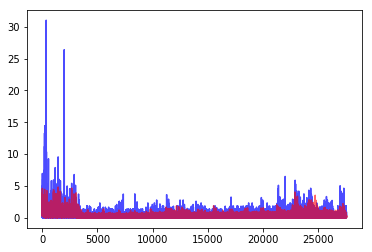

In [101]:
#Lets plot the  first 200 predictions
plt.plot(y_test.as_matrix()[:27540]*max_train, '-', color ='blue', alpha=0.7)
plt.plot(np.asarray(y_pred_)[:27540]*max_train, '-', color ='red', alpha=0.6)
plt.show()

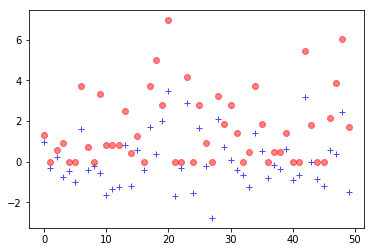

In [102]:
plt.plot((y_test.as_matrix()[0:50]-np.asarray(y_pred_)[:50])*max_train, '+', color ='blue', alpha=0.7)
plt.plot(y_test.as_matrix()[0:50]*max_train, 'ro', color ='red', alpha=0.5)
plt.show()